Task-1: - Perform operations on image

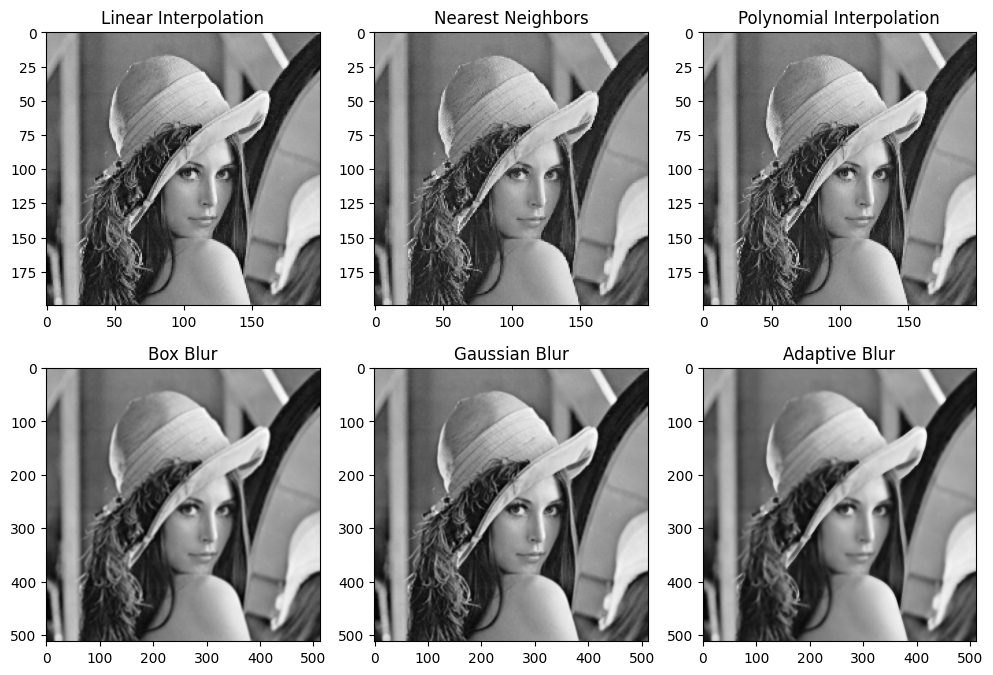

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize




image = cv2.imread('/content/Lab-1 B-31 33 35 36 38.pdf-image-001.jpg', cv2.IMREAD_GRAYSCALE)


resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
resized_polynomial = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)


blur_box = cv2.blur(image, (5,5))
blur_gaussian = cv2.GaussianBlur(image, (5,5), 0)
blur_adaptive = cv2.bilateralFilter(image, 9, 75, 75)


fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(resized_linear, cmap='gray'); axs[0, 0].set_title("Linear Interpolation")
axs[0, 1].imshow(resized_nearest, cmap='gray'); axs[0, 1].set_title("Nearest Neighbors")
axs[0, 2].imshow(resized_polynomial, cmap='gray'); axs[0, 2].set_title("Polynomial Interpolation")
axs[1, 0].imshow(blur_box, cmap='gray'); axs[1, 0].set_title("Box Blur")
axs[1, 1].imshow(blur_gaussian, cmap='gray'); axs[1, 1].set_title("Gaussian Blur")
axs[1, 2].imshow(blur_adaptive, cmap='gray'); axs[1, 2].set_title("Adaptive Blur")
plt.show()




Task-2: - Apply Machine Learning Algorithm and find the model accuracy based on K
fold Cross Validation with (80-20 train-test split).

Training Decision Tree...


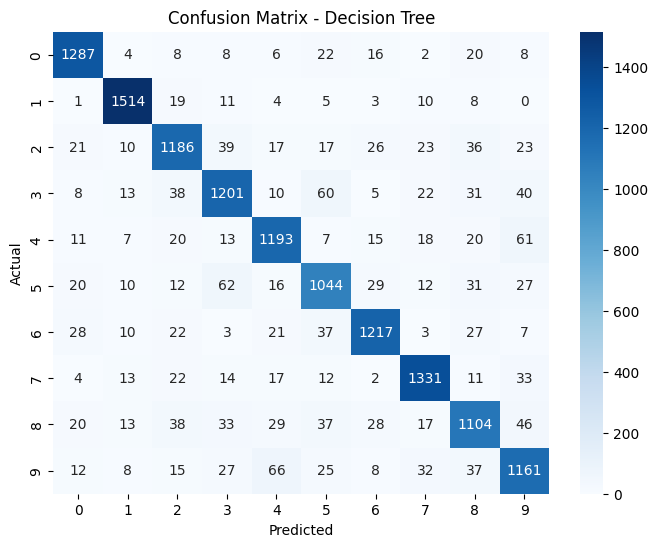

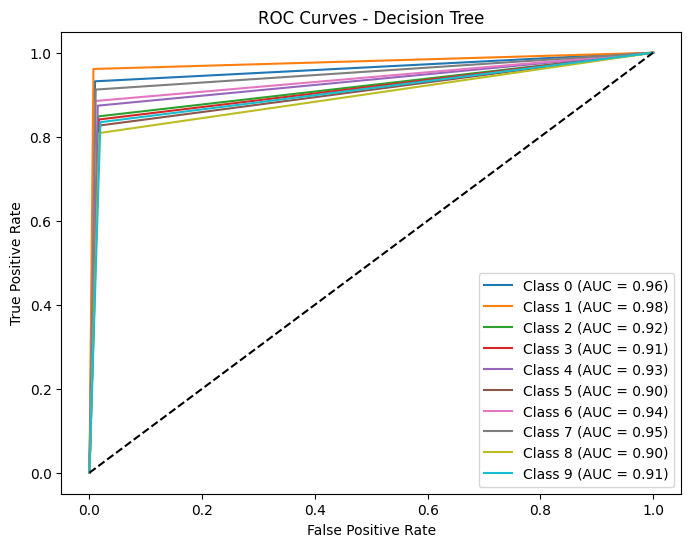

Training Random Forest...


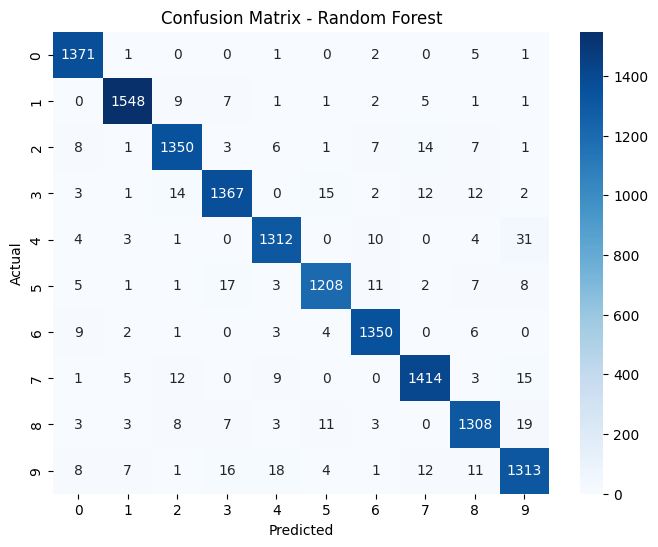

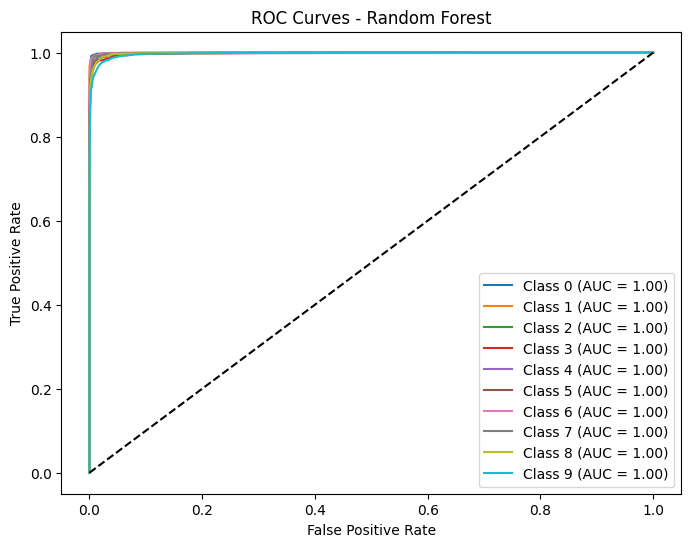

Training AdaBoost...


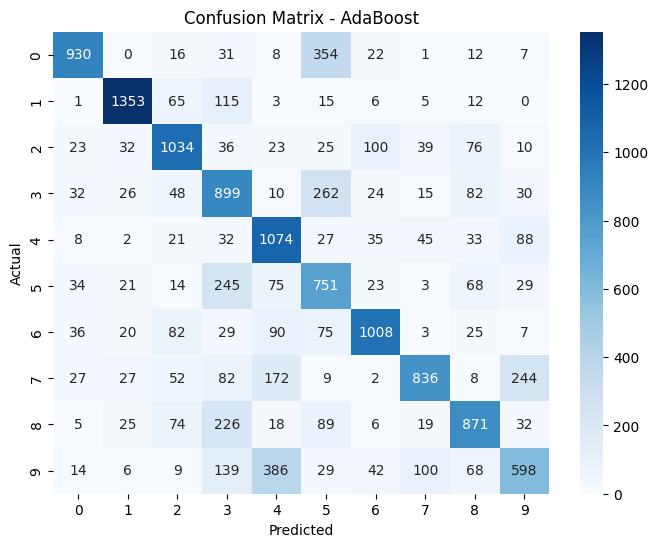

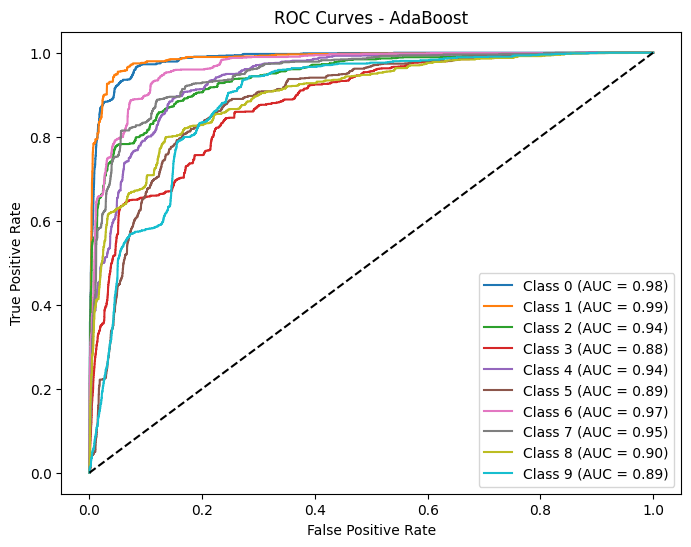


Decision Tree Results:
Cross-validation Accuracy: 0.8653
Test Accuracy: 0.8741
Precision: 0.8739
Recall: 0.8741
F1-score: 0.8739

Random Forest Results:
Cross-validation Accuracy: 0.9673
Test Accuracy: 0.9672
Precision: 0.9672
Recall: 0.9672
F1-score: 0.9672

AdaBoost Results:
Cross-validation Accuracy: 0.6477
Test Accuracy: 0.6681
Precision: 0.6884
Recall: 0.6681
F1-score: 0.6711


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
X, y = mnist.data, mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


results = {}

for name, model in models.items():
    print(f"Training {name}...")


    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)


    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    results[name] = {
        "cv_accuracy": cv_scores.mean(),
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
        "roc_auc": roc_auc
    }

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


    plt.figure(figsize=(8, 6))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - {name}')
    plt.legend()
    plt.show()


for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Cross-validation Accuracy: {metrics['cv_accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")